In [34]:
from tensorflow import keras

In [35]:
#
# 이거 왜 안됨 ??

# (train_input, train_target),(test_input, test_target) = keras.datasets.mnist
(train_input, train_target),(test_input, test_target) = keras.datasets.mnist.load_data()

In [36]:
# train data
print(train_input.shape, train_target.shape)

#test data
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


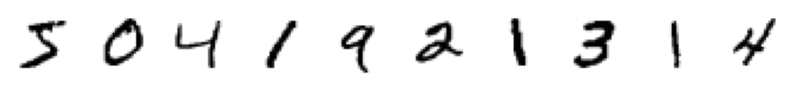

In [37]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,10, figsize = (10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [38]:
# train target

import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


---
## 인공신경망

In [39]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1,28*28)

In [40]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [41]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, activation='softmax', input_shape=(784,))) #정해진것이 나오니 softmax

In [42]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [43]:
model.fit(train_scaled, train_target, epochs=200)

Epoch 1/200
1500/1500 [==============================] - 1s 423us/step - loss: 0.4718 - accuracy: 0.8765
Epoch 2/200
1500/1500 [==============================] - 1s 371us/step - loss: 0.3119 - accuracy: 0.9128
Epoch 3/200
1500/1500 [==============================] - 1s 364us/step - loss: 0.2944 - accuracy: 0.9180
Epoch 4/200
1500/1500 [==============================] - 1s 362us/step - loss: 0.2870 - accuracy: 0.9212
Epoch 5/200
1500/1500 [==============================] - 1s 361us/step - loss: 0.2814 - accuracy: 0.9230
Epoch 6/200
1500/1500 [==============================] - 1s 378us/step - loss: 0.2784 - accuracy: 0.9253
Epoch 7/200
1500/1500 [==============================] - 1s 363us/step - loss: 0.2765 - accuracy: 0.9263
Epoch 8/200
1500/1500 [==============================] - 1s 360us/step - loss: 0.2739 - accuracy: 0.9279
Epoch 9/200
1500/1500 [==============================] - 1s 359us/step - loss: 0.2716 - accuracy: 0.9283
Epoch 10/200
1500/1500 [==============================]

In [44]:
model.evaluate(val_scaled, val_target) # loss: 0.3519 - accuracy: 0.9196

375/375 [==============================] - 0s 342us/step - loss: 0.3519 - accuracy: 0.9196


[0.35188642144203186, 0.9195833206176758]